# EDA Rooms data

To explore all the 81 collumns of this dataframe, the NEO team decided to split the EDA in 3 notebooks: 1- EDA of Structural Data 2- EDA of Rooms data 3- EDA of Mix Data (data that's not about Structural and Rooms data).

The rooms data is composed of 24 categories, which are listed below:

In [1]:
rooms_columns = ['BedroomAbvGr', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1','BsmtFinSF2',
                'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BmstQual',
                'BsmtUnfSF', 'FullBath', 'GarageArea', 'GarageCars', 'GarageCond',
                'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'HalfBath',
                 'KitchenAbvGr', 'KitchenQual', 'TotalBmstSF', 'TotRmsAbvGrd']

## Missing data

The first code used to look for missing data had the objective of finding "NaN" values on the dataframe columns:

In [10]:
import pandas as pd

df = pd.read_csv('C:/Users/gilan/Desktop/Victor/NEO/N67/1.0-vse-eda-rooms/rooms.csv')

print(len(df) - df.count())

Id               0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCars       0
GarageArea       0
GarageQual      81
GarageCond      81
SalePrice        0
dtype: int64


Analysing the output above, it is possible to see missing data on basement and garage related categories. The reason for this is that some of the houses sold don't have basements or garage.

# #Target and predictor variables relation

After searching for missing data, the next step taken was to find a relation between the target variable (SalePrice) and the predictor variables.
First of all, a correlation heatmap was plotted, using the following code:

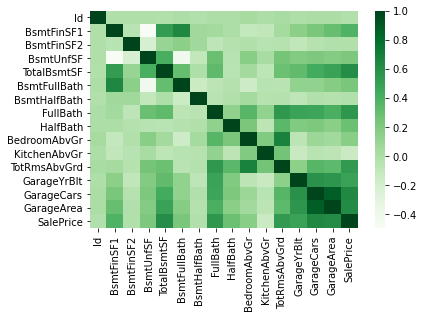

In [9]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/gilan/Desktop/Victor/NEO/N67/1.0-vse-eda-rooms/rooms.csv')
corrMatrix = df.corr()
sn.heatmap(corrMatrix, cmap='Greens')
plt.show()

The algorithm only displayed the quantitative variables of the dataset, as it wasn't able to order the string categories in the qualitative categories. Because of that, this analysis couldn't give us any valuable information.

Afterwards, the predictor variables were divided as continuous variables and discrete variables. By doing this, it became much easier to find a viable way to look at the data.
The analysis done with the continuous variables was a scatter plot, with the x axis being the predictor variable and the y axis being the SalePrice. The following code was used for this plot, using as an example the "BsmtFinSF1" variable:

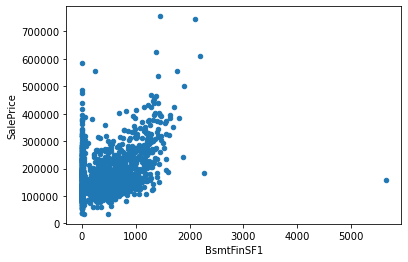

In [11]:
df = pd.read_csv('C:/Users/gilan/Desktop/Victor/NEO/N67/1.0-vse-eda-rooms/rooms.csv')
df.plot.scatter(x='BsmtFinSF1', y='SalePrice')
plt.show()

In this example, we can see that the great majority of the ocurrences have similar values in the "BsmtFinSF1" category, with only very few outliers. At a first look, the variable doesn't seem to influence the target variable very much. One thing that can be done to possibilitate a better analysis of this variable is to exlude these outliers.

The "GarageArea" is another example of a continuous variable analysed in the same way:

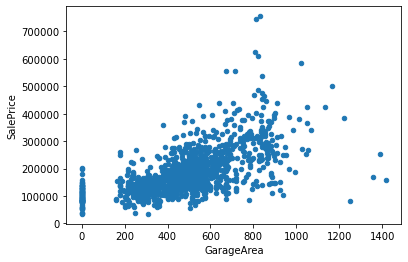

In [12]:
df = pd.read_csv('C:/Users/gilan/Desktop/Victor/NEO/N67/1.0-vse-eda-rooms/rooms.csv')
df.plot.scatter(x='GarageArea', y='SalePrice')
plt.show()

As it can be seen, the "GarageArea" variable has less outliers than the "BsmtFinSF1" one, but it doesn't seem to affect the target variable considerably either.

For the discrete variables, a bar plot was used to analyze their influence in the target variables. The example below shows the code used for it with the 